# Sprint 深層学習スクラッチ 畳み込みニューラルネットワーク1

## 1.このSprintについて

**Sprintの目的**
- スクラッチを通してCNNの基礎を理解する

**どのように学ぶか**

スクラッチで1次元用畳み込みニューラルネットワークを実装した後、学習と検証を行なっていきます。

## 2.1次元の畳み込みニューラルネットワークスクラッチ

**畳み込みニューラルネットワーク（CNN）** のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


このSprintでは1次元の **畳み込み層** を作成し、畳み込みの基礎を理解することを目指します。次のSprintでは2次元畳み込み層とプーリング層を作成することで、一般的に画像に対して利用されるCNNを完成させます。


クラスの名前はScratch1dCNNClassifierとしてください。クラスの構造などは前のSprintで作成したScratchDeepNeuralNetrowkClassifierを参考にしてください。

> 1次元畳み込み層とは

CNNでは画像に対しての2次元畳み込み層が定番ですが、ここでは理解しやすくするためにまずは1次元畳み込み層を実装します。1次元畳み込みは実用上は自然言語や波形データなどの **系列データ** で使われることが多いです。


畳み込みは任意の次元に対して考えることができ、立体データに対しての3次元畳み込みまではフレームワークで一般的に用意されています。

> データセットの用意

検証には引き続きMNISTデータセットを使用します。1次元畳み込みでは全結合のニューラルネットワークと同様に平滑化されたものを入力します。

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.datasets import fashion_mnist
from sklearn.preprocessing import OneHotEncoder

## 【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成

チャンネル数を1に限定した1次元畳み込み層のクラスSimpleConv1dを作成してください。基本構造は前のSprintで作成した全結合層のFCクラスと同じになります。なお、重みの初期化に関するクラスは必要に応じて作り変えてください。Xavierの初期値などを使う点は全結合層と同様です。


ここでは **パディング** は考えず、**ストライド** も1に固定します。また、複数のデータを同時に処理することも考えなくて良く、バッチサイズは1のみに対応してください。この部分の拡張はアドバンス課題とします。


## 【問題2】1次元畳み込み後の出力サイズの計算
畳み込みを行うと特徴量の数が変化します。どのように変化するかは以下の数式から求められます。パディングやストライドも含めています。この計算を行う関数を作成してください。

In [2]:
# 【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成
class SimpleConv1d:
    """
    チャンネル数を1に限定した1次元畳み込み層クラス  
    """
    def __init__(self, n_features=784, f_size=3, n_output=10, padding=0, stride=1):

        self.n_features = n_features
        self.f_size = f_size # フィルターのサイズ
        self.n_output = n_output
        self.padding = padding # ある方向へのパディングの数
        self.stride = stride # ストライドのサイズ

    def forward(self, X, w, b):
        """
        フォワードプロパゲーションの実装
        """
        self.X = X
        self.w = w

        # 入力のサイズ（特徴量の数）
        self.n_in = X.shape[-1]

        # 出力のサイズ（特徴量の数）
        self.n_out = out_size_calc(self.n_in, self.f_size, padding=0, stride=1)
        
        # 出力のサイズに合わせてA1の値を入れる箱を作っておく
        A = np.empty(self.n_out)

        for i in range(self.n_out):
            A[i] = sum(self.X[i: (i + self.f_size)] * w) + b # 問題1式通り
        return A


    def backward(self, delta_a):
        """
        バックプロパゲーションの実装
        """
        # db = np.sum(delta_a)

        dw = np.empty(self.w.shape[0])

        for i in range(dw.shape[0]):
            dw[i] = np.dot(delta_a, self.X[i : (i + self.n_out)])
            # print('dw', dw)

        dx = np.empty(self.X.shape[0])

        for j in range(self.X.shape[0]):
            temp = 0
            for s in range(self.n_out):
                if not((j - s) < 0 or (j - s) > self.n_out):
                    temp += delta_a[s] * w[j - s]
                    # print('temp', temp)
                    # print('-------------')
            dx[j] = temp
        return dx

In [3]:
    # 【問題2】1次元畳み込み後の出力サイズの計算
    def out_size_calc(n_in, f_size, padding=0, stride=1):
        """
        1次元畳み込み後の出力サイズの計算
        """
        # 問題2式通り
        n_out = (n_in + 2*padding - f_size) / stride + 1
        return int(n_out) # 上の式の結果がfloatになるため、整数intにする

## 【問題3】小さな配列での1次元畳み込み層の実験
次に示す小さな配列でフォワードプロパゲーションとバックプロパゲーションが正しく行えているか確認してください。


入力x、重みw、バイアスbを次のようにします。

In [4]:
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])

In [5]:
# インスタンス化
SimpleConv1d = SimpleConv1d(n_features=4)

In [6]:
# フォワードプロパゲーション
a = SimpleConv1d.forward(x, w, b)
a

array([35., 50.])

In [7]:
# バックプロパゲーション
delta_a = np.array([10, 20]) # 予め与えられたloss(誤差)
delta_x = SimpleConv1d.backward(delta_a)
delta_x

array([ 30., 110., 170., 140.])

## 【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成
チャンネル数を1に限定しない1次元畳み込み層のクラスConv1dを作成してください。



In [8]:
# 【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成
class Conv1d:
    """
    チャンネル数を限定しない1次元畳み込み層クラス  
    """
    def __init__(self, n_features=784, f_size=3, n_output=10, n_in_channels=1, n_out_channels=1, \
                 padding=0, stride=1):

        self.n_features = n_features
        self.f_size = f_size # フィルターのサイズ
        self.n_output = n_output
        self.n_in_channels = n_in_channels # 入力チャンネル数
        self.n_out_channels = n_out_channels # 出力チャンネル数
        self.padding = padding # ある方向へのパディングの数
        self.stride = stride # ストライドのサイズ

    def forward(self, X, w, b):
        """
        フォワードプロパゲーションの実装
        Parameters
        ----------
        X : （入力チャンネル数、入力特徴量数）
    
        Returns
        ----------
        A : （出力チャンネル数、出力特徴量数）
        """
        self.X = X
        self.W = w
        self.B = b

        # 入力特徴量数
        self.n_in = X.shape[-1]
        # print('self.n_in', self.n_in)

        # 出力特徴量数
        self.n_out = out_size_calc(self.n_in, self.f_size, padding=0, stride=1)
        # print('self.n_out', self.n_out)
        
        # Aの値を入れる箱を作っておく（出力チャンネル数、特徴量数）
        A = np.empty((self.n_out_channels, self.n_out))

        # # 出力チャンネル数分回す
        # for i in range(self.n_out_channels):

        #     # 出力特徴量数分回す
        #     for j in range(self.n_out):

        #         temp = 0
        #         # 入力チャネル数分回す
        #         for s in range(self.n_in_channels):
        #             # temp += np.dot(self.X[s][j: (j + self.f_size)], w[i][s].T)
        #             # print('temp', temp)
        #             temp += sum(self.X[s][j: (j + self.f_size)] * w[i][s])
        #             print('temp', temp)
        #         A[i][j] = temp + b[i]

        for i in range(self.n_out_channels): # 出力チャンネル数分回す

            for j in range(self.n_out): # 出力特徴量数分回す

                # チャンネルごとアダマール積⇒行方向足し算⇒チャネル間足し算⇒バイアスを足す
                A[i][j] = np.sum(np.sum(self.X[ :, j : (j + self.f_size)] * self.W[i], axis=1)) + b[i]
        return A


    def backward(self, dA):
        """
        バックプロパゲーションの実装
        Parameters
        ----------
        dA : 後ろから流れてきた勾配（出力チャンネル数、出力特徴量数）
            
        Returns
        ----------
        dX : 前に流す勾配（入力チャンネル数、入力特徴量数）
        """
        # dW,dBの値を入れる箱を作っておく
        self.dW = np.empty(self.W.shape)
        self.dB = np.empty(self.B.shape)
        for n_out_ch in range(self.n_out_channels): # 出力チャンネル数分回す
            for n_out in range(self.n_out): # 出力特徴量数分回す
                for n_in_ch in range(self.n_in_channels): # 入力チャネル数分回す
                    for f_size in range(self.f_size): # フィルターのサイズ分回す
                        self.dW[n_out_ch, n_in_ch, f_size] += dA[n_out_ch, n_out]\
                        *self.X[n_in_ch, n_out + f_size]
                self.dB[n_out_ch] += dA[n_out_ch, n_out]

        # dXの値を入れる箱を作っておく(サンプル数, 入力チャネル数, 入力特徴量数)
        dX = np.empty((self.n_in_channels, self.n_in))
        for n_in_ch in range(self.n_in_channels): # 入力チャネル数分回す
            for n_in in range(self.n_in): # 入力特徴量数
                for n_out_ch in range(self.n_out_channels): # 出力チャンネル数分回す
                    for f_size in range(self.f_size): # フィルターのサイズ分回す
                        if 0 <= n_in - f_size <= self.n_out - 1:
                            dX[n_in_ch, n_in] += dA[n_out_ch, n_in - f_size]\
                            *self.W[n_out_ch, n_in_ch, f_size]

        return dX


例えば以下のようなx, w, bがあった場合は、

In [9]:
x = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # shape(2, 4)で、（入力チャンネル数、特徴量数）である。
w = np.array([[[1, 1, 2], [2, 1, 1]], [[2, 1, 1], [1, 1, 1]], [[1, 1, 1], [1, 1, 1]]]) # (出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
b = np.array([1, 2, 3]) # （出力チャンネル数）

入力が2チャンネル、出力が3チャンネルの例です。計算グラフを書いた上で、バックプロパゲーションも手計算で考えてみましょう。計算グラフの中には和と積しか登場しないので、微分を新たに考える必要はありません。

**《補足》**


チャンネル数を加える場合、配列をどういう順番にするかという問題があります。(バッチサイズ、チャンネル数、特徴量数)または(バッチサイズ、特徴量数、チャンネル数)が一般的で、ライブラリによって順番は異なっています。（切り替えて使用できるものもあります）


今回のスクラッチでは自身の実装上どちらが効率的かを考えて選んでください。上記の例ではバッチサイズは考えておらず、(チャンネル数、特徴量数)です。

In [10]:
# インスタンス化
Conv1d = Conv1d(n_features=4, n_in_channels=2,  n_out_channels=3)

In [11]:
# フォワードプロパゲーション
a = Conv1d.forward(x, w, b)
a

array([[21., 29.],
       [18., 25.],
       [18., 24.]])

In [12]:
# # X入力チャンネル数、フィルター入力チャンネル数を増やして動作確認
# x2 = np.array([[1, 2, 3, 4], [2, 3, 4, 5], [3, 4, 5, 6]]) # shape(3, 4)で、（入力チャンネル数、特徴量数）である。
# w2 = np.array([[[1, 1, 2], [2, 1, 1], [1, 1, 1],], [[2, 1, 1], [1, 1, 1], [1, 1, 1],], [[1, 1, 1], [1, 1, 1], [1, 1, 1],]]) # (出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
# # b = np.array([1, 2, 3]) # （出力チャンネル数）

In [13]:
# # フォワードプロパゲーション
# a2 = Conv1d.forward(x2, w2, b)
# a2

## 【問題5】（アドバンス課題）パディングの実装

畳み込み層にパディングの機能を加えてください。1次元配列の場合、前後にn個特徴量を増やせるようにしてください。


最も単純なパディングは全て0で埋める **ゼロパディング** であり、CNNでは一般的です。他に端の値を繰り返す方法などもあります。


フレームワークによっては、元の入力のサイズを保つようにという指定をすることができます。この機能も持たせておくと便利です。なお、NumPyにはパディングの関数が存在します。

[numpy.pad — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html)

(参考サイト)[numpy.pad関数完全理解](https://qiita.com/kuroitu/items/51f4c867c8a44de739ec)

## 【問題6】（アドバンス課題）ミニバッチへの対応
ここまでの課題はバッチサイズ1で良いとしてきました。しかし、実際は全結合層同様にミニバッチ学習が行われます。Conv1dクラスを複数のデータが同時に計算できるように変更してください。

In [12]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma

    def W(self, *shape):
        """
        重みの初期化
        """
        # 各種shapeに対応できるよう改造(n_nodes1, n_nodes2)⇒(*shape)
        W = self.sigma * np.random.randn(*shape)
        return W

    def B(self, *shape):
        """
        バイアスの初期化
        """
        # 各種shapeに対応できるよう改造(n_nodes1, n_nodes2)⇒(*shape)
        B = self.sigma * np.random.randn(*shape)
        return B

In [13]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        return

In [14]:
class Conv1d02:
    """
    チャンネル数を限定しない1次元畳み込み層クラス  
    パディングの実装、ミニバッチへ対応
    """
    def __init__(self, f_size, initializer, optimizer, n_in_channels=1, n_out_channels=1, padding=0):
        self.f_size = f_size # フィルターのサイズ
        self.W = initializer.W(n_out_channels, n_in_channels, f_size) # 重み
        self.B = initializer.B(n_out_channels) # バイアス
        self.optimizer = optimizer # 重みの初期化
        self.n_in_channels = n_in_channels # 入力チャンネル数
        self.n_out_channels = n_out_channels # 出力チャンネル数
        self.pa = padding # ある方向へのパディングの数

    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 入力, shape (サンプル数, 入力チャネル数, 入力特徴量数)
            
        Returns
        ----------
        A : 出力, shape (サンプル数, 出力チャンネル数, 出力特徴量数)
            
        """
        self.n_samples = X.shape[0] # サンプル数
        print('self.n_samples', self.n_samples)
        self.n_in = X.shape[-1] # 入力特徴量数
        print('self.n_in', self.n_in)
        self.n_out = out_size_calc(self.n_in, self.f_size, self.pa)  # 出力特徴量数
        print('self.n_out', self.n_out)

        self.X1 = np.pad(X, ((0,0),(0,0),(self.pa,self.pa))) # (0,0),(0,0)上下/(self.pa,self.pa)左右
        print('self.X1', self.X1, sep='\n')
        # Aの値を入れる箱を作っておく（サンプル数, 出力チャンネル数, 出力特徴量数）
        A = np.zeros((self.n_samples, self.n_out_channels, self.n_out))
        for n_sam in range(self.n_samples): # サンプル数分回す
            for n_out_ch in range(self.n_out_channels): # 出力チャンネル数分回す
                for n_out in range(self.n_out): # 出力特徴量数分回す
                    for n_in_ch in range(self.n_in_channels): # 入力チャネル数分回す
                        for f_size in range(self.f_size): # フィルターのサイズ分回す
                            A[n_sam, n_out_ch, n_out] += self.X1[n_sam, n_in_ch, n_out+f_size]\
                            *self.W[n_out_ch, n_in_ch, f_size]
                    A[n_sam, n_out_ch, n_out] += self.B[n_out_ch]

        return A

    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA :後ろから流れてきた勾配, shape (サンプル数, 出力チャンネル数, 出力特徴量数)
            
        Returns
        ----------
        dX : 前に流す勾配, shape (サンプル数, 入力チャネル数, 入力特徴量数)
        """
        # dW,dBの値を入れる箱を作っておく
        self.dW = np.empty(self.W.shape)
        self.dB = np.empty(self.B.shape)
        for n_sam in range(self.n_samples): # サンプル数分回す
            for n_out_ch in range(self.n_out_channels): # 出力チャンネル数分回す
                for n_out in range(self.n_out): # 出力特徴量数分回す
                    for n_in_ch in range(self.n_in_channels): # 入力チャネル数分回す
                        for f_size in range(self.f_size): # フィルターのサイズ分回す
                            self.dW[n_out_ch, n_in_ch, f_size] += dA[n_sam, n_out_ch, n_out]\
                            *self.X1[n_sam, n_in_ch, n_out+f_size]
                    self.dB[n_out_ch] += dA[n_sam, n_out_ch, n_out]

        # dXの値を入れる箱を作っておく(サンプル数, 入力チャネル数, 入力特徴量数)
        dX = np.empty((self.n_samples, self.n_in_channels, self.n_in))
        for n_sam in range(self.n_samples): # サンプル数分回す
            for n_in_ch in range(self.n_in_channels): # 入力チャネル数分回す
                for n_in in range(self.n_in): # 入力特徴量数
                    for n_out_ch in range(self.n_out_channels): # 出力チャンネル数分回す
                        for f_size in range(self.f_size): # フィルターのサイズ分回す
                            if 0 <= n_in - f_size <= self.n_out - 1:
                                dX[n_sam, n_in_ch, n_in] += dA[n_sam, n_out_ch, n_in - f_size]\
                                *self.W[n_out_ch, n_in_ch, f_size]

        # 更新
        self.optimizer.update(self)
        return dX

In [15]:
# 【問題5】パディング実装のテスト(padding=1)
conv1d02 = Conv1d02(f_size=3, initializer=SimpleInitializer(0.01), optimizer=SGD(0.01), \
                    n_in_channels=1, n_out_channels=1, padding=1)

In [16]:
x = np.array([[[1, 2, 3, 4, 5, 6]], [[2, 3, 4, 5, 6, 7]]]) # shape(2, 1, 6)（サンプル数、入力チャンネル数、特徴量数）
x

array([[[1, 2, 3, 4, 5, 6]],

       [[2, 3, 4, 5, 6, 7]]])

In [17]:
# フォワードプロパゲーション
a = conv1d02.forward(x)
a

self.n_samples 2
self.n_in 6
self.n_out 6
self.X1
[[[0 1 2 3 4 5 6 0]]

 [[0 2 3 4 5 6 7 0]]]


array([[[-0.01596728, -0.04206349, -0.06815971, -0.09425593,
         -0.12035214, -0.1044398 ]],

       [[-0.02557519, -0.06815971, -0.09425593, -0.12035214,
         -0.14644836, -0.12453479]]])

**パディング機能により、出力特徴量数が減らずに、入力特徴量数と同じく6となっている。**

In [18]:
# バックプロパゲーション
delta_a = np.array([[[1, 2, 3, 4, 5, 6]], [[2, 3, 4, 5, 6, 7]]])
delta_x = conv1d02.backward(delta_a)
delta_x

array([[[-0.03245558, -0.07864679, -0.13083922, -0.18303165,
         -0.23522408, -0.24540796]],

       [[-0.05855179, -0.124838  , -0.18303165, -0.23522408,
         -0.28741651, -0.29159916]]])

## 【問題7】（アドバンス課題）任意のストライド数

ストライドは1限定の実装をしてきましたが、任意のストライド数に対応できるようにしてください。

In [19]:
class Conv1d03:
    """
    チャンネル数を限定しない1次元畳み込み層クラス  
    パディングの実装、ミニバッチへ対応、任意のストライド数
    """
    def __init__(self, f_size, initializer, optimizer, n_in_channels=1, n_out_channels=1, padding=0, stride=1):
        self.f_size = f_size # フィルターのサイズ
        self.W = initializer.W(n_out_channels, n_in_channels, f_size) # 重み
        self.B = initializer.B(n_out_channels) # バイアス
        self.optimizer = optimizer # 重みの初期化
        self.n_in_channels = n_in_channels # 入力チャンネル数
        self.n_out_channels = n_out_channels # 出力チャンネル数
        self.pa = padding # ある方向へのパディングの数
        self.st = stride # ストライドのサイズ

    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 入力, shape (サンプル数, 入力チャネル数, 入力特徴量数)
            
        Returns
        ----------
        A : 出力, shape (サンプル数, 出力チャンネル数, 出力特徴量数)
        """
        self.n_samples = X.shape[0] # サンプル数
        self.n_in = X.shape[-1] # 入力特徴量数
        self.n_out = out_size_calc(self.n_in, self.f_size, self.pa, self.st)  # 出力特徴量数
        X = X.reshape(self.n_samples, self.n_in_channels, self.n_in)

        self.X = np.pad(X, ((0,0),(0,0),(self.pa,self.pa))) # (0,0),(0,0)上下/(self.pa,self.pa)左右
        # print('self.X', self.X, sep='\n')
        # Aの値を入れる箱を作っておく（サンプル数, 出力チャンネル数, 出力特徴量数）
        A = np.zeros((self.n_samples, self.n_out_channels, self.n_out))
        for n_sam in range(self.n_samples): # サンプル数分回す
            for n_out_ch in range(self.n_out_channels): # 出力チャンネル数分回す
                for n_out in range(self.n_out): # 出力特徴量数分回す
                    for n_in_ch in range(self.n_in_channels): # 入力チャネル数分回す
                        for f_size in range(self.f_size): # フィルターのサイズ分回す
                            A[n_sam, n_out_ch, n_out] += self.X[n_sam, n_in_ch, n_out*self.st+f_size]\
                            *self.W[n_out_ch, n_in_ch, f_size]
                    A[n_sam, n_out_ch, n_out] += self.B[n_out_ch]

        return A

    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA :後ろから流れてきた勾配, shape (サンプル数, 出力チャンネル数, 出力特徴量数)
            
        Returns
        ----------
        dX : 前に流す勾配, shape (サンプル数, 入力チャネル数, 入力特徴量数)
        """
        # dW,dBの値を入れる箱を作っておく
        self.dW = np.empty(self.W.shape)
        self.dB = np.empty(self.B.shape)
        for n_sam in range(self.n_samples): # サンプル数分回す
            for n_out_ch in range(self.n_out_channels): # 出力チャンネル数分回す
                for n_out in range(self.n_out): # 出力特徴量数分回す
                    for n_in_ch in range(self.n_in_channels): # 入力チャネル数分回す
                        for f_size in range(self.f_size): # フィルターのサイズ分回す
                            self.dW[n_out_ch, n_in_ch, f_size] += dA[n_sam, n_out_ch, n_out]\
                            *self.X[n_sam, n_in_ch, n_out*self.st + f_size]
                    self.dB[n_out_ch] += dA[n_sam, n_out_ch, n_out]

        # dXの値を入れる箱を作っておく(サンプル数, 入力チャネル数, 入力特徴量数)
        dX = np.empty((self.n_samples, self.n_in_channels, self.n_in))
        for n_sam in range(self.n_samples): # サンプル数分回す
            for n_in_ch in range(self.n_in_channels): # 入力チャネル数分回す
                for n_in in range(self.n_in): # 入力特徴量数
                    for n_out_ch in range(self.n_out_channels): # 出力チャンネル数分回す
                        for f_size in range(self.f_size): # フィルターのサイズ分回す
                            if 0 <= n_in - f_size <= self.n_out - 1:
                                dX[n_sam, n_in_ch, n_in] += dA[n_sam, n_out_ch, n_in - f_size]\
                                *self.W[n_out_ch, n_in_ch, f_size]

        # 更新
        self.optimizer.update(self)
        return dX

In [20]:
# 【問題7】ストライドは1限定しないテスト(stride=2)
conv1d03_test = Conv1d03(f_size=3, initializer=SimpleInitializer(0.01), optimizer=SGD(0.01), \
                    n_in_channels=1, n_out_channels=1, padding=1, stride=2)

In [21]:
x = np.array([[[1, 2, 3, 4, 5, 6]], [[2, 3, 4, 5, 6, 7]]]) # shape(2, 1, 6)（サンプル数、入力チャンネル数、特徴量数）
x

array([[[1, 2, 3, 4, 5, 6]],

       [[2, 3, 4, 5, 6, 7]]])

In [22]:
# フォワードプロパゲーション
a = conv1d03_test.forward(x)
a

array([[[-0.03852505, -0.08652626, -0.13452747]],

       [[-0.06620438, -0.11052686, -0.15852807]]])

In [23]:
# バックプロパゲーション
delta_a = np.array([[[1, 2, 3, 4, 5, 6]], [[2, 3, 4, 5, 6, 7]]])
delta_x = conv1d03_test.backward(delta_a)
delta_x

array([[[ 3.67872008e-003, -1.03846453e-002, -3.43852485e-002,
         -7.31007320e-002, -2.98117135e-002,  2.96439388e-323]],

       [[ 7.35744015e-003, -2.44480107e-002, -5.83858517e-002,
         -1.00780055e-001, -3.97489513e-002,  3.45845952e-323]]])

## 3.検証

## 【問題8】学習と推定
これまで使ってきたニューラルネットワークの全結合層の一部をConv1dに置き換えてMNISTを学習・推定し、Accuracyを計算してください。


出力層だけは全結合層をそのまま使ってください。ただし、チャンネルが複数ある状態では全結合層への入力は行えません。その段階でのチャンネルは1になるようにするか、 **平滑化** を行なってください。


画像に対しての1次元畳み込みは実用上は行わないことのため、精度は問いません。

In [24]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = initializer.W(n_nodes1, n_nodes2)
        self.B = initializer.B(n_nodes2)

    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.X = X        
        A = X@self.W + self.B # 線形変換
        return A

    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        self.dB = np.sum(dA, axis=0)
        self.dW = self.X.T@dA
        dZ = dA@self.W.T

        # 更新
        self = self.optimizer.update(self)
        
        return dZ

In [25]:
class Sigmoid:
    """
    活性化関数 : 　シグモイド関数
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロパゲーションのときの処理
        """
        self.Z = 1 / (1 + np.exp(-A))
        return self.Z

    def backward(self, dZ):
        """
        バックプロパゲーションのときの処理
        """
        dA = dZ * (1 - self.Z) * self.Z
        return dA

In [26]:
class Tanh:
    """
    活性化関数 : 　ハイパボリックタンジェント関数
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロパゲーションのときの処理
        """
        self.Z = np.tanh(A)
        return self.Z

    def backward(self, dZ):
        """
        バックプロパゲーションのときの処理
        """
        dA = dZ * (1 - self.Z ** 2) 
        return dA

In [27]:
class Softmax:
    """
    活性化関数 : 　ソフトマックス関数
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロパゲーションのときの処理
        """
        c = np.max(A) # オーバーフロー対策
        self.Z = np.exp(A - c) / np.sum(np.exp(A - c), axis=1).reshape(-1,1)
        return self.Z

    def backward(self, Y):
        """
        バックプロパゲーションのときの処理
        """
        dA = self.Z - Y
        return dA

    def loss_func(self, Z, Y):
        """
        損失関数（目的関数）:交差エントロピー誤差
        """
        loss = -(Y * np.log(Z)).mean(axis=0).sum()
        return loss

In [28]:
class ReLU:
    """
    活性化関数 : 　ReLU関数
    """
    def __init__(self):
        pass

    def forward(self, A):
        """
        フォワードプロパゲーションのときの処理
        """
        self.A = A
        self.Z = np.maximum(A, 0)
        return self.Z

    def backward(self, dZ):
        """
        バックプロパゲーションのときの処理
        """
        dA = np.where(self.Z > 0, 1*dZ, 0)
        return dA

In [29]:
class XavierInitializer():
    """
    重みとバイアスの初期値 : シグモイド関数やハイパボリックタンジェント関数のとき
    """
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W : shape(n_nodes1, n_nodes2)
        """
        self.sigma = 1 / np.sqrt(n_nodes1) # Xavierの初期値における標準偏差
        W = np.random.normal(0, self.sigma, (n_nodes1, n_nodes2)) 
        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B : shape(n_nodes2, )
        """
        B = np.random.normal(0, self.sigma, n_nodes2) 
        return B

In [30]:
class HeInitializer():
    """
    重みとバイアスの初期値 : ReLU関数のとき
    """
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        W : shape(n_nodes1, n_nodes2)
        """
        self.sigma = np.sqrt(2 / n_nodes1) # Heの初期値における標準偏差
        W = np.random.normal(0, self.sigma, (n_nodes1, n_nodes2)) 
        return W

    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
        Returns
        ----------
        B : shape(n_nodes2, )
        """
        B = np.random.normal(0, self.sigma, n_nodes2) 
        return B

In [31]:
class AdaGrad:
    """
    AdaGrad
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        self.HW = 0
        self.HB = 0
    
    def update(self, layer):
        self.HW += layer.dW ** 2
        self.HB += layer.dB ** 2
        layer.W -= self.lr * np.sqrt(1 / (self.HW + 1e-7)) * layer.dW # 1e-7加算は０除算防止のため
        layer.B -= self.lr * np.sqrt(1 / (self.HB + 1e-7)) * layer.dB # 1e-7加算は０除算のため

In [32]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [33]:
class Scratch1dCNNClassifier:
    """
    1次元の畳み込みニューラルネットワーク分類器
    ----------
    lr : 学習率
    batch_size : バッチサイズ   
    n_epoch : エポック数
    verbose : Trueの場合、学習曲線をプロット
    ----------
    """
    n_features, n_nodes1, n_nodes2, n_output = 784, 400, 200, 10
    
    def __init__(self, batch_size=20, n_epoch=5, lr=0.01, Activater=ReLU, \
                 Optimizer=AdaGrad, verbose=True):
        self.verbose = verbose
        self.batch_size = batch_size
        self.entropys = []
        self.val_entropys = []
        self.n_epoch = n_epoch
        self.lr = lr  # 学習率

        # 使う活性化関数によって重みやバイアスの初期値の分岐
        self.Activater = Activater
        if Activater == Sigmoid or Activater == Tanh:
            self.Initializer = XavierInitializer
        else:
            self.Initializer = HeInitializer

        # 最適化手法の選択
        self.Optimizer = Optimizer

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        # Optimizer=AdaGradを想定し、FC毎にインスタンス化
        self.conv1d03 = Conv1d03(f_size=7, initializer=SimpleInitializer(0.01), \
                            optimizer=self.Optimizer(self.lr), padding=3, stride=2)
        # 出力特徴量数
        self.conv1d03.n_out = out_size_calc(X.shape[-1], self.conv1d03.f_size,\
                                                     self.conv1d03.pa, self.conv1d03.st)
        self.activation1 = self.Activater()
        self.FC2 = FC(self.conv1d03.n_out, self.n_nodes2, self.Initializer(), self.Optimizer(self.lr))
        self.activation2 = self.Activater()
        self.FC3 = FC(self.n_nodes2, self.n_output, self.Initializer(), self.Optimizer(self.lr))
        self.activation3 = Softmax()

        self.entropys = []  # 誤差を入れるリストを用意

        # yをone-hot表現に変換
        onehot_y = (y.reshape(-1, 1) == np.arange(self.n_output)).astype(np.float64)

        # バッチに分割
        get_mini_batch = GetMiniBatch(X, onehot_y, batch_size=self.batch_size) 

        # 検証用データが存在する場合
        if X_val is not None:
            # y_valをone-hot表現に変換
            onehot_y_val = (y_val.reshape(-1, 1) == np.arange(self.n_output)).astype(np.float64)
            # 交差エントロピー誤差を入れるリストを作っておく
            self.val_entropys = []

        # 学習開始(エポック数分繰り返す)
        for epoch in range(self.n_epoch):

            # ミニバッチの個数分ループ
            for mini_X_train, mini_y_train in get_mini_batch:

                # フォワードプロパゲーション
                self.forward(mini_X_train)

                # バックプロパゲーション
                dA3 = self.activation3.backward(mini_y_train) # 交差エントロピー誤差とソフトマックスを合わせている
                dZ2 = self.FC3.backward(dA3)
                dA2 = self.activation2.backward(dZ2)
                dZ1 = self.FC2.backward(dA2)
                dA1 = self.activation1.backward(dZ1)
                dA1 = dA1[:, np.newaxis]
                dZ0 = self.conv1d03.backward(dA1) # dZ0は使用しない
                
            # エントロピーを計算するためXを予測
            Z3 = self.forward(X)
            # 1サンプル毎の平均誤差をリストに格納
            self.entropys.append(self.activation3.loss_func(Z3, onehot_y)) 

            # 検証用データが存在する場合
            if X_val is not None:
                Z3_val = self.forward(X_val)
                self.val_entropys.append(
                    self.activation3.loss_func(Z3_val, onehot_y_val))

    def forward(self, X):
        """
        フォワードプロパゲーションの実装
        """
        # 《サンプルコード2》
        A1 = self.conv1d03.forward(X)
        A1 = A1.reshape(A1.shape[0], A1.shape[-1])
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

In [34]:
# MNISTのデータセットを読み込み
import numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 平滑化
X_train = x_train.reshape(-1, 784) # (60000, 784)
X_test = x_test.reshape(-1, 784) # (10000, 784)

In [35]:
# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [36]:
# 分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [ ]:
scratch_1dcnn = Scratch1dCNNClassifier() # インスタンス生成
scratch_1dcnn.fit(X_train, y_train, X_val, y_val) # 学習

In [155]:
y_pred = scratch_1dcnn.predict(X_val) # 推定

# Accuracyを計算
from sklearn.metrics import accuracy_score
print("Accuracy_score : ", accuracy_score(y_val, y_pred))

Accuracy_score :  0.963


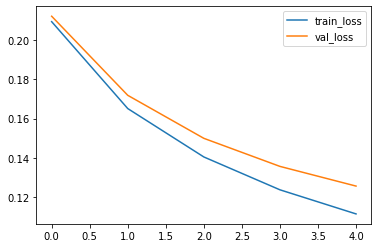

In [156]:
import matplotlib.pyplot as plt
plt.plot(scratch_1dcnn.entropys, label='train_loss')
plt.plot(scratch_1dcnn.val_entropys,label='val_loss')
plt.legend()
plt.show()